<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1 - Pregunta 2 </H3>
<hr style="height:2px;border:none"/>

**Integrantes**  
* Eliana Providel - 692018101-3
* Rodrigo Hermosilla - 9574144-4

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

In [2]:
import keras
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
keras.backend.set_session(sess)

/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<a id="segundo"></a>
## 2. Selección de Atributos. 

> ENUNCIADO: En esta segunda parte de la tarea estudiaremos un _dataset_ llamado "House Sales in King County", un conjunto de datos de ventas de casas, con diversa información sobre las casas vendidas y los precios de venta. Por la naturaleza variada de las casas y las percepciones de las personas que las compran el **problema de predecir el valor de una casa** a ser vendida resulta interesante pues si bien muchos supuestos razonables se cumplen la mayoría de las veces (una casa más grande suele costar más que una más chica), la percepción de los compradores puede cambiar mucho por caracteristicas dificiles de medir. 

<img src="https://pngimage.net/wp-content/uploads/2018/06/house-for-sale-sign-png-6.png"  style="height:5cm;"  />

> Sin embargo, resulta facil imaginar que algunos de los datos resultan más relevantes que otros al momento de predecir, por esto haremos selección de atributos en esta parte de la pregunta. Este _dataset_ es mucho más limpio que lo usual, por lo cual la exploración inicial sera bastante corta. Luego de explorar los datos deberan realizar una exploración de los distintos atributos para evaluar que tan relevantes son en la predicción del resultado. Puede descargar el _dataset_ desde https://www.kaggle.com/harlfoxem/housesalesprediction donde también encontrará una descripción de las distintas columnas.

#### 2.a Carga de datos 

> Cargue los datos a un DataFrame. Transformaremos la columna "date" como indica el siguiente código. Que transformación realiza este código? Elimine las columnas que le parezca pertinente. 

In [3]:
## Cargar los datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("kc_house_data.csv")
data_original = data.copy()

##### Conociendo los datos

In [4]:
## conociendo las columnas y su significado
print(data.columns.tolist())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


##### Descripción de Dataset

| Columna | Descripción |
| :----- | :----- | 
| id   | identificación de la casa       | 
| date   | fecha en que se vendio la casa       | 
| price   | precio es el objetivo de predicción     | 
| bedrooms   | número de habitaciones de la casa     | 
| bathrooms   | número de baños de la casa     | 
| sqft_living   | pies cuadrados de la casa     | 
| sqft_lot  | pies cuadrados del lote     | 
| floors   | total de pisos (niveles) de la casa     | 
| waterfront   | casa que tiene vista a un paseo marítimo     |
| view   | indica si ha sido visto     |
| condition   | que tan buena es la condición general     |
| grade   | grado dado a la casa, basado en el sistema de calificación del Condado de King     |
| sqft_above   | pies cuadrados de casa aparte del sotáno     |
| sqft_basement   | piés cuadrados del sótano     |
| yr_built   | año de construcción     |
| yr_renovated   | año en que la casa fue renovada     |
| zipcode   | código postal     |
| lat   | coordenada de latitud    |
| long   | coordenada de longitud     |
| sqft_living15   | Área de sala de estar en 2015   (implica-- algunas renovaciones) Esto podría o no haber afectado el área de tamaño grandes|
| sqft_lot15   | área de tamaño de lote en 2015 (implica algunas renovaciones)     |

In [5]:
##Verificando la existencia de valores nulos y el tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
## (filas,columas) del dataframe
print(data.shape)

(21613, 21)


In [7]:
##conociendo los datos
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


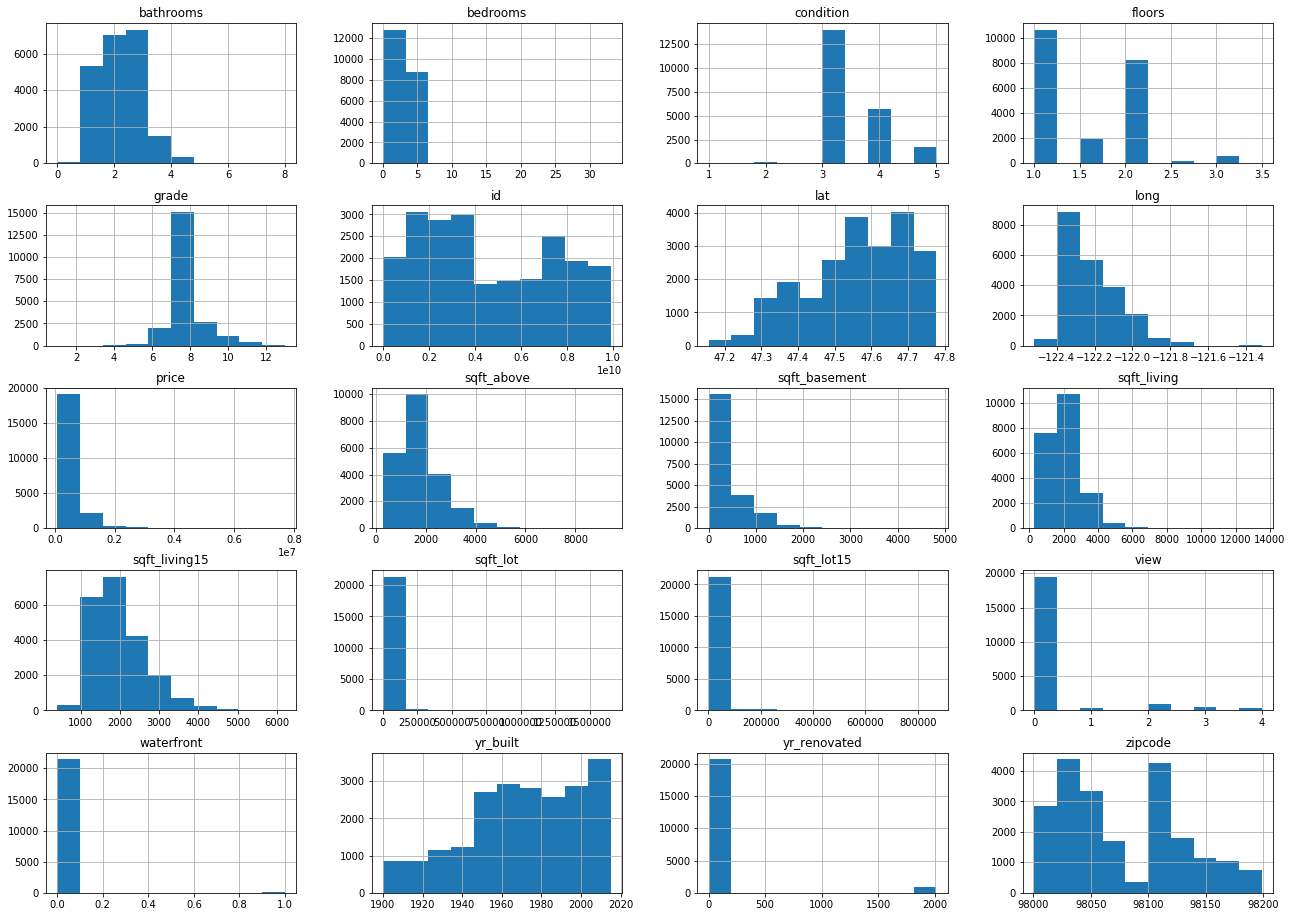

In [8]:
#Para ver la distribución de los datos por columna
data.hist(figsize=(22,16))
plt.show()

In [9]:
## viendo algunas estadísticas generales de los datos
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


><b> Tranformando la columna date. ¿Qué transformación realiza el código?</b>

In [10]:
##verificando formato previo
print(data['date'].head())

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object


In [11]:
## Transformación de columna date- según enunciado
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))   
    return res
data['date'] = data.date.apply(to_num).rank()

In [12]:
print(data['date'].head())

0    10544.0
1    13682.5
2    16699.0
3    13682.5
4    16276.0
Name: date, dtype: float64


**Comentario**: El código tranforma los números que estan antes de la T a float64, dado que estaba en tipo de datos *object*. El num[i] x 10^(7-i) busca que la transformación de las fechas, represente un valor unico en el rango destino.

> **Columnas eliminadas y justificación **

Antes de eliminar columnas, se verifica los datos en detalle de cada columna y su clasificación.

----------------------------------------------------
Datos agrupados por valor de columna:  date
34.0        67
69.5         4
74.0         5
118.5       84
202.0       83
290.0       93
377.0       81
458.0       81
501.0        5
504.5        2
545.5       80
628.5       86
712.0       81
793.5       82
871.0       73
908.0        1
912.0        7
957.0       83
1056.5     116
1161.5      94
1254.0      91
1341.5      84
1389.0      11
1397.0       5
1403.5       8
1459.5     104
1567.0     111
1660.0      75
1730.0      65
1765.5       6
          ... 
19956.0      5
19961.5      6
20003.0     77
20101.0    119
20221.0    121
20336.5    110
20443.0    103
20502.5     16
20517.0     13
20586.5    126
20710.0    121
20827.5    114
20926.0     83
21006.0     77
21047.5      6
21055.5     10
21111.5    102
21209.5     94
21300.5     88
21382.5     76
21447.5     54
21476.0      3
21478.5      2
21499.5     40
21544.0     49
21584.0     31
21605.0     11
21611.0      1
21612.0      1
216

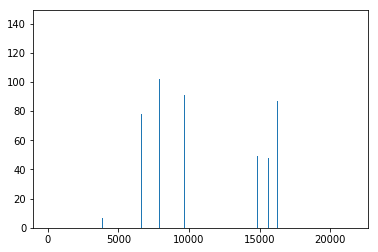

----------------------------------------------------
Datos agrupados por valor de columna:  price
75000.0      1
78000.0      1
80000.0      1
81000.0      1
82000.0      1
82500.0      1
83000.0      1
84000.0      1
85000.0      2
86500.0      1
89000.0      1
89950.0      1
90000.0      5
92000.0      1
95000.0      4
96500.0      1
99000.0      1
100000.0     6
102500.0     1
104950.0     1
105000.0     2
105500.0     1
106000.0     1
107000.0     2
109000.0     1
109500.0     1
110000.0     8
110700.0     1
111300.0     1
112000.0     1
            ..
3120000.0    1
3168750.0    1
3200000.0    4
3204000.0    1
3278000.0    1
3300000.0    4
3345000.0    1
3395000.0    1
3400000.0    2
3418800.0    1
3567000.0    1
3600000.0    1
3635000.0    1
3640900.0    1
3650000.0    2
3710000.0    1
3800000.0    2
3850000.0    1
4000000.0    1
4208000.0    1
4489000.0    1
4500000.0    1
4668000.0    1
5110800.0    1
5300000.0    1
5350000.0    1
5570000.0    1
6885000.0    1
7062500.0    1
77

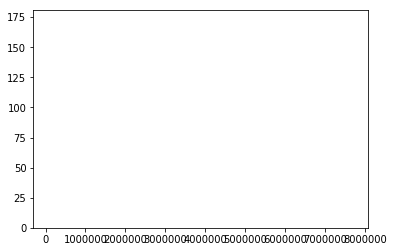

----------------------------------------------------
Datos agrupados por valor de columna:  bedrooms
0       13
1      194
2     2736
3     9731
4     6849
5     1586
6      265
7       38
8       13
9        6
10       3
11       1
33       1
Name: id, dtype: int64


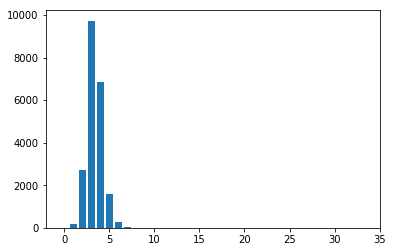

----------------------------------------------------
Datos agrupados por valor de columna:  bathrooms
0.00      10
0.50       4
0.75      71
1.00    3795
1.25       9
1.50    1430
1.75    3020
2.00    1913
2.25    2031
2.50    5355
2.75    1182
3.00     747
3.25     586
3.50     729
3.75     155
4.00     134
4.25      79
4.50      99
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: id, dtype: int64


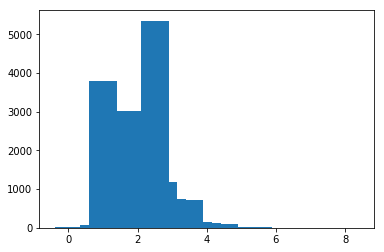

----------------------------------------------------
Datos agrupados por valor de columna:  sqft_living
290       1
370       1
380       1
384       1
390       2
410       1
420       2
430       1
440       1
460       1
470       2
480       2
490       1
500       1
520       6
530       3
540       2
550       4
560       4
570       3
580       4
590       5
600       7
610       4
620      11
630       5
640       5
650       3
660       6
670      25
         ..
6980      1
7000      1
7050      1
7080      1
7100      1
7120      1
7220      1
7270      1
7320      1
7350      1
7390      1
7400      1
7420      1
7440      1
7480      1
7620      1
7710      1
7730      1
7850      1
7880      1
8000      1
8010      1
8020      1
8670      1
9200      1
9640      1
9890      1
10040     1
12050     1
13540     1
Name: id, Length: 1038, dtype: int64


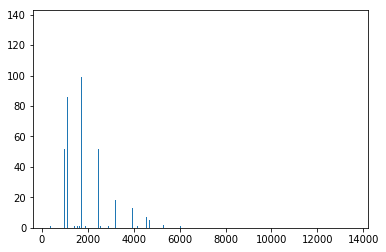

----------------------------------------------------
Datos agrupados por valor de columna:  sqft_lot
520        1
572        1
600        1
609        1
635        1
638        1
649        2
651        1
675        1
676        1
681        1
683        1
690        2
696        1
698        1
700        1
704        1
705        2
711        2
713        1
720        1
725        1
736        1
740        1
745        2
746        1
747        2
750        2
758        1
761        1
          ..
426452     1
432036     1
434728     1
435600     6
438213     1
443440     1
453895     1
478288     1
493534     1
499571     1
501376     1
503989     1
505166     1
507038     1
533610     1
542322     1
577605     1
623779     1
641203     1
715690     1
843309     1
871200     2
881654     1
920423     1
982278     1
982998     1
1024068    1
1074218    1
1164794    1
1651359    1
Name: id, Length: 9782, dtype: int64


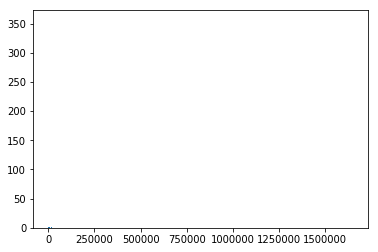

----------------------------------------------------
Datos agrupados por valor de columna:  floors
1.0    10559
1.5     1888
2.0     8209
2.5      161
3.0      611
3.5        8
Name: id, dtype: int64


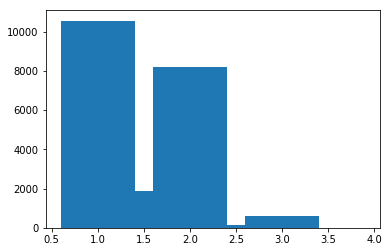

----------------------------------------------------
Datos agrupados por valor de columna:  waterfront
0    21273
1      163
Name: id, dtype: int64


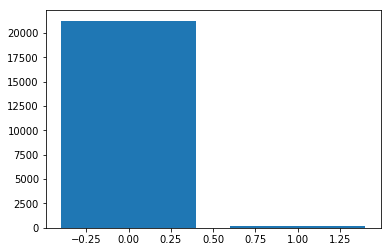

----------------------------------------------------
Datos agrupados por valor de columna:  view
0    19320
1      331
2      962
3      507
4      316
Name: id, dtype: int64


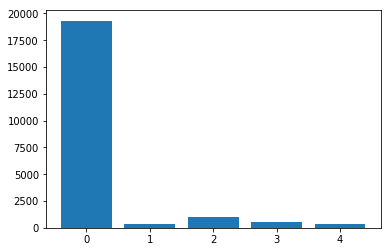

----------------------------------------------------
Datos agrupados por valor de columna:  condition
1       29
2      164
3    13911
4     5645
5     1687
Name: id, dtype: int64


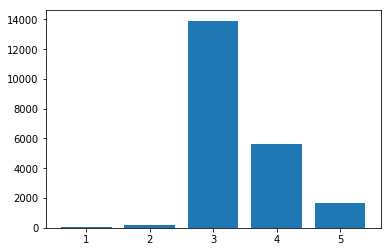

----------------------------------------------------
Datos agrupados por valor de columna:  grade
1        1
3        3
4       29
5      234
6     1995
7     8896
8     6044
9     2606
10    1130
11     396
12      89
13      13
Name: id, dtype: int64


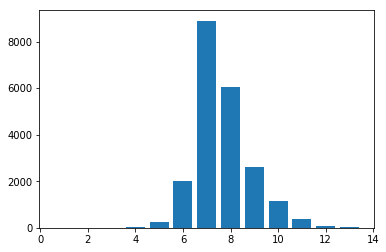

----------------------------------------------------
Datos agrupados por valor de columna:  sqft_above
290      1
370      1
380      1
384      1
390      2
410      1
420      2
430      1
440      1
460      1
470      2
480      4
490      2
500      2
520      6
530      3
540      2
550      6
560      5
570      5
580     12
590     10
600     13
610      8
620     15
630      8
640      7
650      7
660      9
670     31
        ..
5844     1
5980     1
5990     2
6050     1
6070     2
6085     1
6090     1
6110     2
6120     1
6200     1
6220     1
6290     1
6350     1
6370     1
6380     1
6420     1
6430     1
6530     1
6640     1
6660     1
6720     1
7320     1
7420     1
7680     1
7850     1
7880     1
8020     1
8570     1
8860     1
9410     1
Name: id, Length: 946, dtype: int64


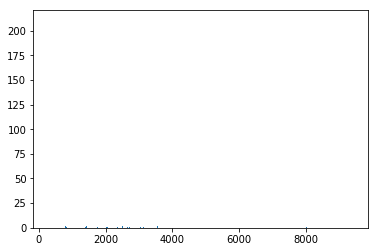

----------------------------------------------------
Datos agrupados por valor de columna:  sqft_basement
0       13015
10          1
20          1
40          4
50         11
60         10
65          1
70          7
80         20
90         21
100        45
110        18
120        54
130        26
140        56
143         1
145         5
150        45
160        29
170        29
172         1
176         1
180        38
190        33
200       106
207         1
210        28
220        43
225         1
230        11
        ...  
2200        2
2220        3
2240        1
2250        1
2300        1
2310        1
2330        1
2350        1
2360        1
2390        1
2400        1
2490        1
2500        1
2550        2
2570        1
2580        1
2590        1
2600        1
2610        1
2620        1
2720        1
2730        1
2810        1
2850        1
3000        1
3260        1
3480        1
3500        1
4130        1
4820        1
Name: id, Length: 306, dtype: int64


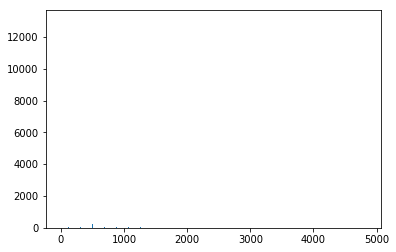

----------------------------------------------------
Datos agrupados por valor de columna:  yr_built
1900     86
1901     29
1902     27
1903     45
1904     44
1905     74
1906     91
1907     65
1908     86
1909     94
1910    132
1911     72
1912     77
1913     58
1914     53
1915     64
1916     79
1917     56
1918    120
1919     88
1920     98
1921     73
1922     92
1923     83
1924    139
1925    163
1926    177
1927    115
1928    125
1929    114
       ... 
1986    215
1987    292
1988    267
1989    290
1990    318
1991    223
1992    198
1993    200
1994    248
1995    167
1996    194
1997    174
1998    239
1999    264
2000    218
2001    303
2002    222
2003    422
2004    429
2005    450
2006    454
2007    415
2008    367
2009    229
2010    143
2011    130
2012    169
2013    199
2014    559
2015     38
Name: id, Length: 116, dtype: int64


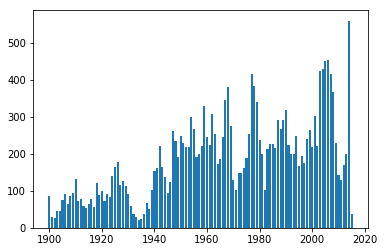

----------------------------------------------------
Datos agrupados por valor de columna:  yr_renovated
0       20526
1934        1
1940        2
1944        1
1945        3
1946        2
1948        1
1950        2
1951        1
1953        3
1954        1
1955        3
1956        3
1957        3
1958        5
1959        1
1960        4
1962        2
1963        4
1964        4
1965        5
1967        2
1968        8
1969        4
1970        9
1971        2
1972        4
1973        5
1974        3
1975        6
        ...  
1986       17
1987       18
1988       15
1989       22
1990       24
1991       20
1992       17
1993       19
1994       19
1995       16
1996       15
1997       15
1998       19
1999       17
2000       35
2001       19
2002       22
2003       36
2004       26
2005       35
2006       24
2007       35
2008       18
2009       22
2010       18
2011       13
2012       11
2013       37
2014       91
2015       16
Name: id, Length: 70, dtype: int64


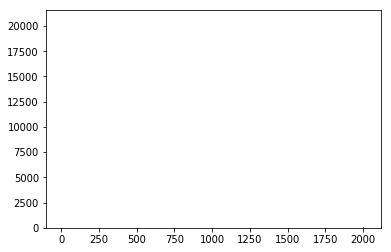

----------------------------------------------------
Datos agrupados por valor de columna:  zipcode
98001    359
98002    197
98003    276
98004    315
98005    168
98006    490
98007    139
98008    283
98010     99
98011    194
98014    123
98019    190
98022    234
98023    492
98024     80
98027    411
98028    282
98029    320
98030    253
98031    272
98032    123
98033    431
98034    543
98038    587
98039     49
98040    282
98042    547
98045    219
98052    571
98053    402
        ... 
98092    351
98102    105
98103    600
98105    229
98106    330
98107    264
98108    185
98109    109
98112    268
98115    576
98116    329
98117    548
98118    499
98119    184
98122    289
98125    403
98126    352
98133    485
98136    263
98144    340
98146    281
98148     56
98155    442
98166    250
98168    264
98177    254
98178    258
98188    135
98198    275
98199    316
Name: id, Length: 70, dtype: int64


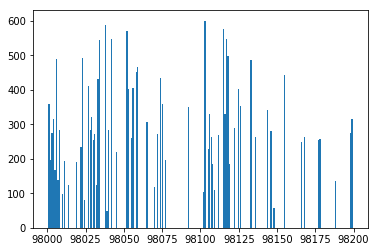

----------------------------------------------------
Datos agrupados por valor de columna:  lat
47.1559    1
47.1593    1
47.1622    1
47.1647    1
47.1764    1
47.1775    1
47.1776    2
47.1795    1
47.1803    1
47.1808    1
47.1840    1
47.1853    1
47.1879    1
47.1895    1
47.1896    2
47.1900    2
47.1903    1
47.1913    2
47.1923    1
47.1924    1
47.1927    3
47.1928    1
47.1932    1
47.1934    1
47.1936    1
47.1937    3
47.1938    1
47.1940    1
47.1941    2
47.1942    2
          ..
47.7746    5
47.7747    1
47.7748    4
47.7749    4
47.7750    3
47.7751    7
47.7752    3
47.7753    6
47.7754    6
47.7755    2
47.7756    3
47.7757    8
47.7758    5
47.7759    3
47.7760    7
47.7761    2
47.7762    7
47.7763    3
47.7764    2
47.7765    3
47.7766    4
47.7767    6
47.7768    2
47.7769    3
47.7770    2
47.7771    2
47.7772    3
47.7774    1
47.7775    3
47.7776    3
Name: id, Length: 5034, dtype: int64


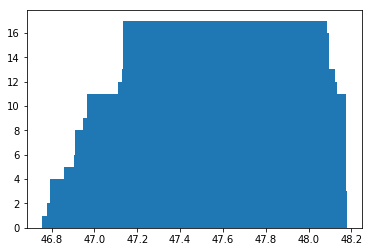

----------------------------------------------------
Datos agrupados por valor de columna:  long
-122.519    1
-122.515    1
-122.514    1
-122.512    1
-122.511    2
-122.509    2
-122.507    1
-122.506    1
-122.505    3
-122.504    2
-122.503    2
-122.502    1
-122.499    1
-122.497    2
-122.496    1
-122.491    1
-122.490    2
-122.486    1
-122.484    1
-122.482    2
-122.479    1
-122.475    2
-122.474    1
-122.473    1
-122.472    3
-122.470    2
-122.469    1
-122.467    1
-122.465    3
-122.464    5
           ..
-121.723    4
-121.721    1
-121.719    2
-121.718    2
-121.716    1
-121.714    3
-121.713    1
-121.711    1
-121.709    2
-121.708    1
-121.707    3
-121.701    1
-121.698    3
-121.691    1
-121.676    1
-121.646    1
-121.480    1
-121.473    1
-121.417    1
-121.405    1
-121.403    1
-121.402    1
-121.364    2
-121.359    1
-121.352    2
-121.325    1
-121.321    1
-121.319    1
-121.316    1
-121.315    2
Name: id, Length: 752, dtype: int64


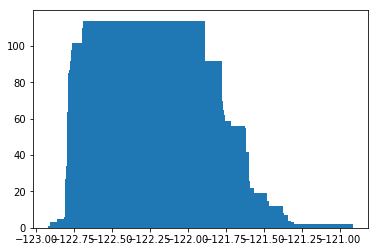

----------------------------------------------------
Datos agrupados por valor de columna:  sqft_living15
399      1
460      2
620      2
670      1
690      2
700      2
710      2
720      2
740      8
750      3
760      3
770      1
780      5
790      2
800      3
806      1
810      2
820      7
828      1
830      9
840     13
850     12
860     10
870      9
880     12
890     10
900     17
910      8
920     22
930     12
        ..
4760     5
4770     2
4780     1
4800     2
4830     3
4850     2
4890     1
4900     1
4913     1
4920     5
4930     1
4940     1
4950     1
5000     1
5030     2
5070     1
5080     1
5110     1
5170     1
5200     1
5220     1
5330     1
5340     1
5380     1
5500     1
5600     1
5610     1
5790     6
6110     1
6210     1
Name: id, Length: 777, dtype: int64


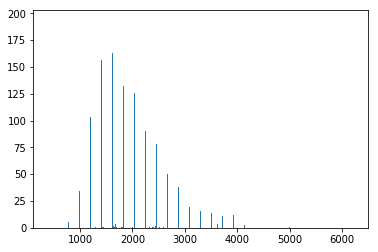

----------------------------------------------------
Datos agrupados por valor de columna:  sqft_lot15
651       1
659       1
660       1
748       2
750       4
755       1
757       1
758       1
788       1
794       1
809       1
810       2
817       2
824       1
886       5
887       1
899       1
914       1
915       4
925       1
928       3
942       8
953       1
955       2
958       1
964       1
967       1
972       1
976       1
977       2
         ..
268765    1
273556    1
273992    1
275299    1
283140    1
289978    1
291416    1
292645    1
297514    2
298182    1
310582    1
311610    1
320890    1
325393    2
326097    1
335289    1
339332    1
358934    1
360000    1
380279    1
386812    1
392040    2
411962    1
422967    1
425581    1
434728    1
438213    1
560617    1
858132    1
871200    1
Name: id, Length: 8689, dtype: int64


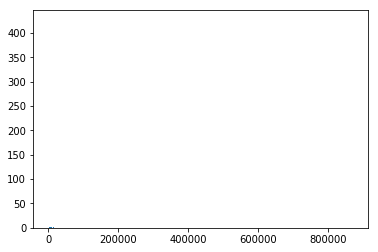

In [13]:
for col in data.columns:
    if(col != 'id'):
        print("----------------------------------------------------")
        print("Datos agrupados por valor de columna: ",(data.groupby(col).id.nunique()).transpose())
        #Para ver la distribución de los datos por columna
        axisX = []
        axisY = []
        axisX = np.unique(data[col].dropna())
        axisY = np.array(data.groupby(col).id.nunique()) 
        plt.bar(axisX,axisY)
        plt.show()   

In [14]:
def plot_boxplot(num_row, num_col, data_):
    fig, axs = plt.subplots(num_row, num_col, figsize=(30,25))

    col = data_.columns
    k = 0
    for i in range(num_row):
        for j in range(num_col):
            if(k == 0):## No graficamos id, son todos distintos
                k = k + 1
            axs[i, j].boxplot(data_[col[k]], vert=False, patch_artist=True)
            axs[i, j].set_title(col[k])
            k = k +1 

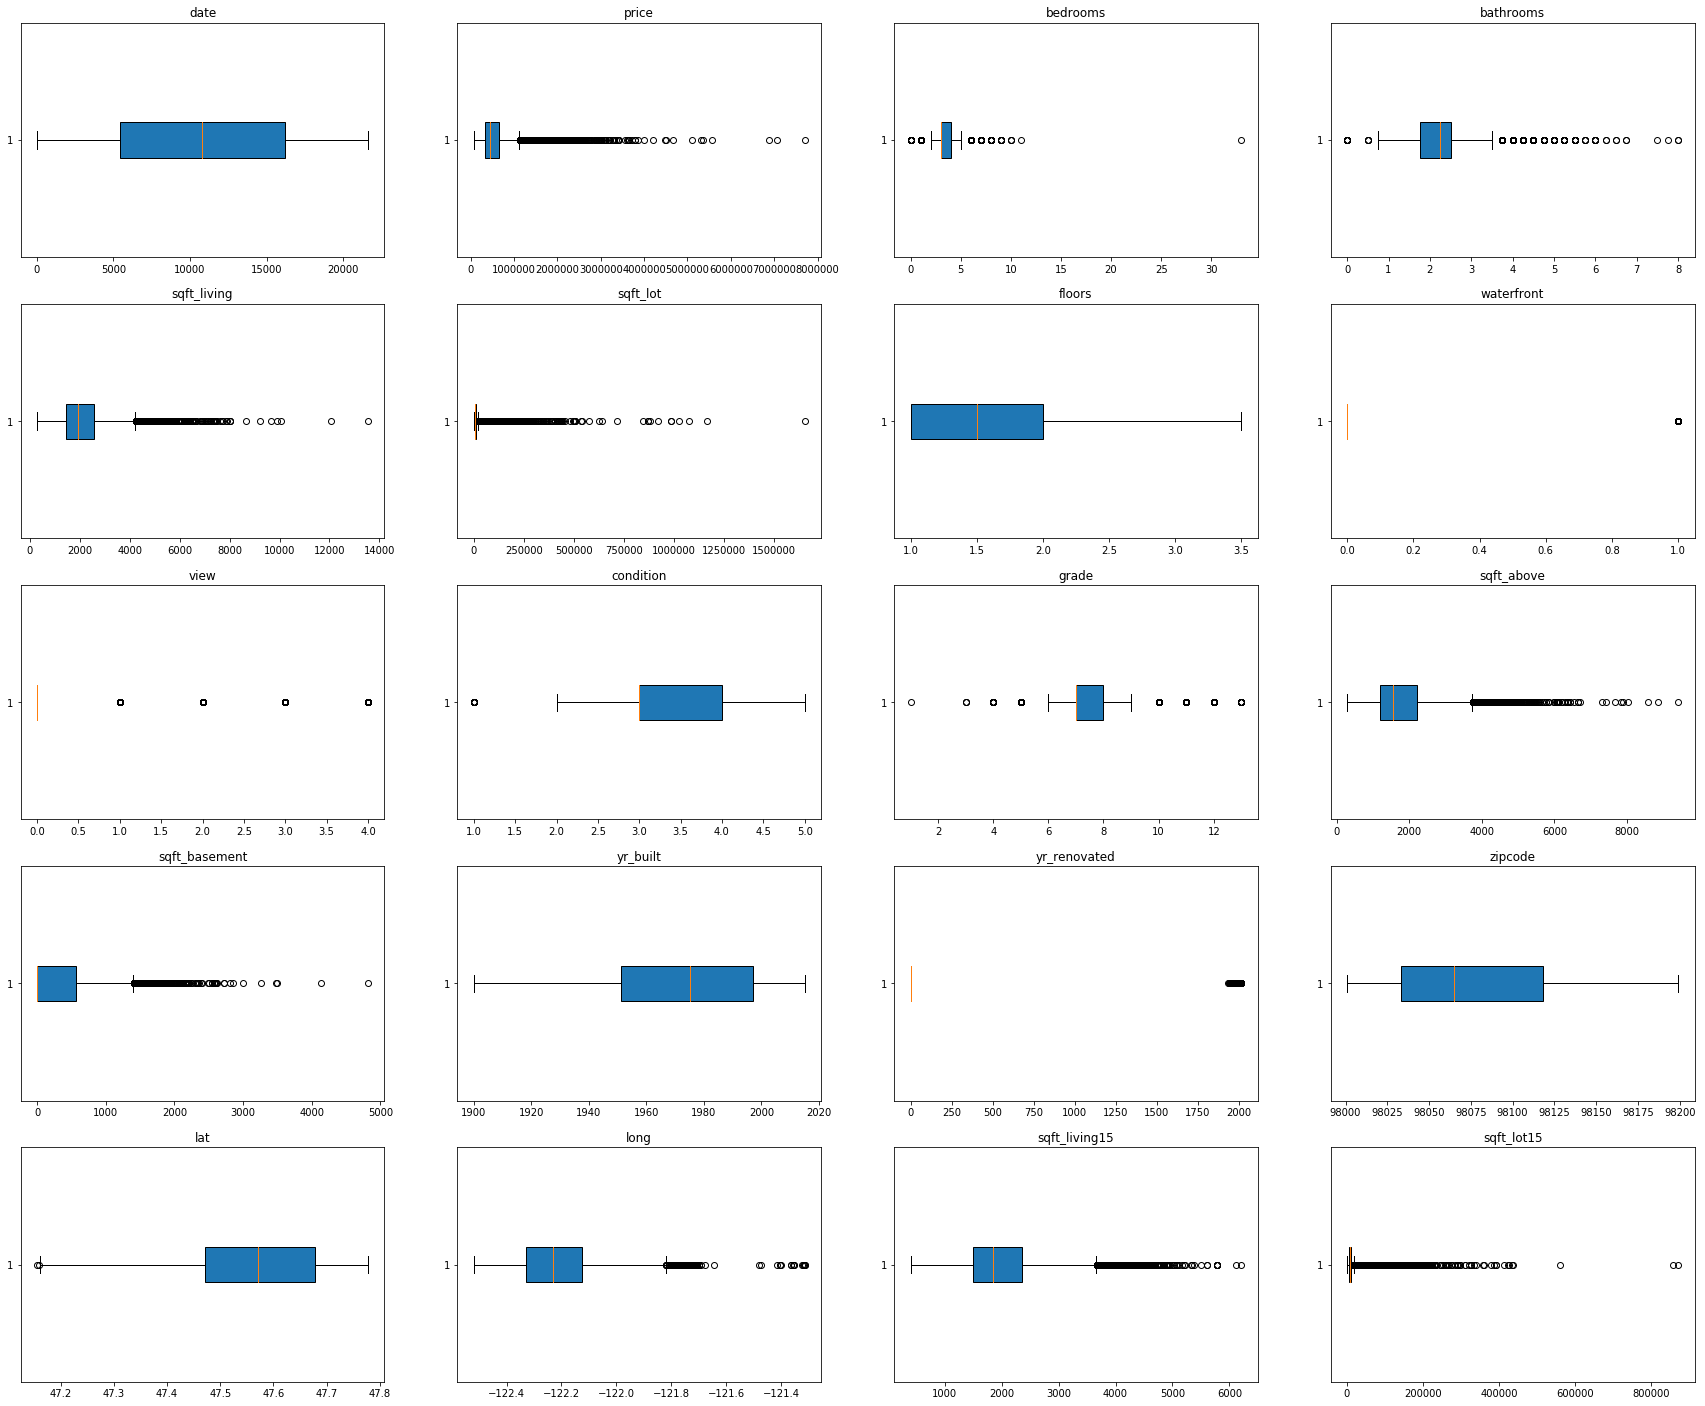

In [15]:
plot_boxplot(5, 4, data)

Las columnas que se eliminan son por los siguientes motivos:
- Por ser todos los datos iguales o casí iguales, por lo que su contenido se considera que no aporta en la predicción. Esto esta relacionado con la Varianza, considerando que aquellos atributos que tienen mayor varianza aportaran de forma positiva al modelo.
- Por la definición del atributo, considerando que no es una característica clave para la relación entre atributos (subjetivo)

In [16]:
print(data.dtypes)

id                 int64
date             float64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [17]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
#Vemos la varianza de cada columna, sabiendo que indica: 
# qué tan dispersos están los datos alrededor de su media. Será un aspecto a considerar
# para eliminar  columnas. Considerando que aquellos datos que tienen mayor varianza aportan mayor
#información al modelo.
stats=pd.DataFrame()
stats["mean"]=data.mean()
stats["Var"]=data.var()
print(stats)

                       mean           Var
id             4.580302e+09  8.274629e+18
date           1.080700e+04  3.892797e+07
price          5.400881e+05  1.347824e+11
bedrooms       3.370842e+00  8.650150e-01
bathrooms      2.114757e+00  5.931513e-01
sqft_living    2.079900e+03  8.435337e+05
sqft_lot       1.510697e+04  1.715659e+09
floors         1.494309e+00  2.915880e-01
waterfront     7.541757e-03  7.485226e-03
view           2.343034e-01  5.872426e-01
condition      3.409430e+00  4.234665e-01
grade          7.656873e+00  1.381703e+00
sqft_above     1.788391e+03  6.857347e+05
sqft_basement  2.915090e+02  1.958727e+05
yr_built       1.971005e+03  8.627973e+02
yr_renovated   8.440226e+01  1.613462e+05
zipcode        9.807794e+04  2.862788e+03
lat            4.756005e+01  1.919990e-02
long          -1.222139e+02  1.983262e-02
sqft_living15  1.986552e+03  4.697612e+05
sqft_lot15     1.276846e+04  7.455182e+08


In [19]:
##eliminando los datos
data = data.drop(columns=['id','sqft_lot','sqft_lot15','zipcode']) 

Es importante destacar que se hicieron varias pruebas, eliminando distintos atributos, entre lo que esta por ejemplo, eliminar sólo id, eliminar sólo: 'id','sqft_lot','sqft_lot15', ..., entre otras. Con respecto a zipcode, también se realizo la prueba incluyendo y no incluyendo zipcode, y los resultados fueron muy similares. 

In [20]:
##Verificando los datos, para corroborar eliminación
print(data.dtypes)

date             float64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
dtype: object


In [21]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15
0,10544.0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340
1,13682.5,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690
2,16699.0,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720
3,13682.5,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360
4,16276.0,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800


#### 2.b Preprocesamiento de los datos y visualización
Escale los datos de la misma forma que en la pregunta 1. Realice _Scatter plots_ de algunas pares (atributo, precio) que ustedes crean sean más significativos. Comente.

En este caso es recomendable estandarizar "a mano", pues mantener la estructura de DataFrame facilitará el ítem siguiente. En todo caso, puede elegir la opción que prefiera. 

Si la curiosidad, imaginación y tiempo le alcanza pruebe también realizando algunas transformaciones simples (logaritmica, cuadrática, _etc._)

[//]: <> ( https://vignette.wikia.nocookie.net/inciclopedia/images/6/6a/Bob_esponja_caja_de_imaginacion.JPG/revision/latest?cb=20081122000821 )

In [22]:
print(data.columns.tolist())

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15']


In [23]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15
0,10544.0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340
1,13682.5,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690
2,16699.0,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720
3,13682.5,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360
4,16276.0,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800


<Figure size 432x288 with 0 Axes>

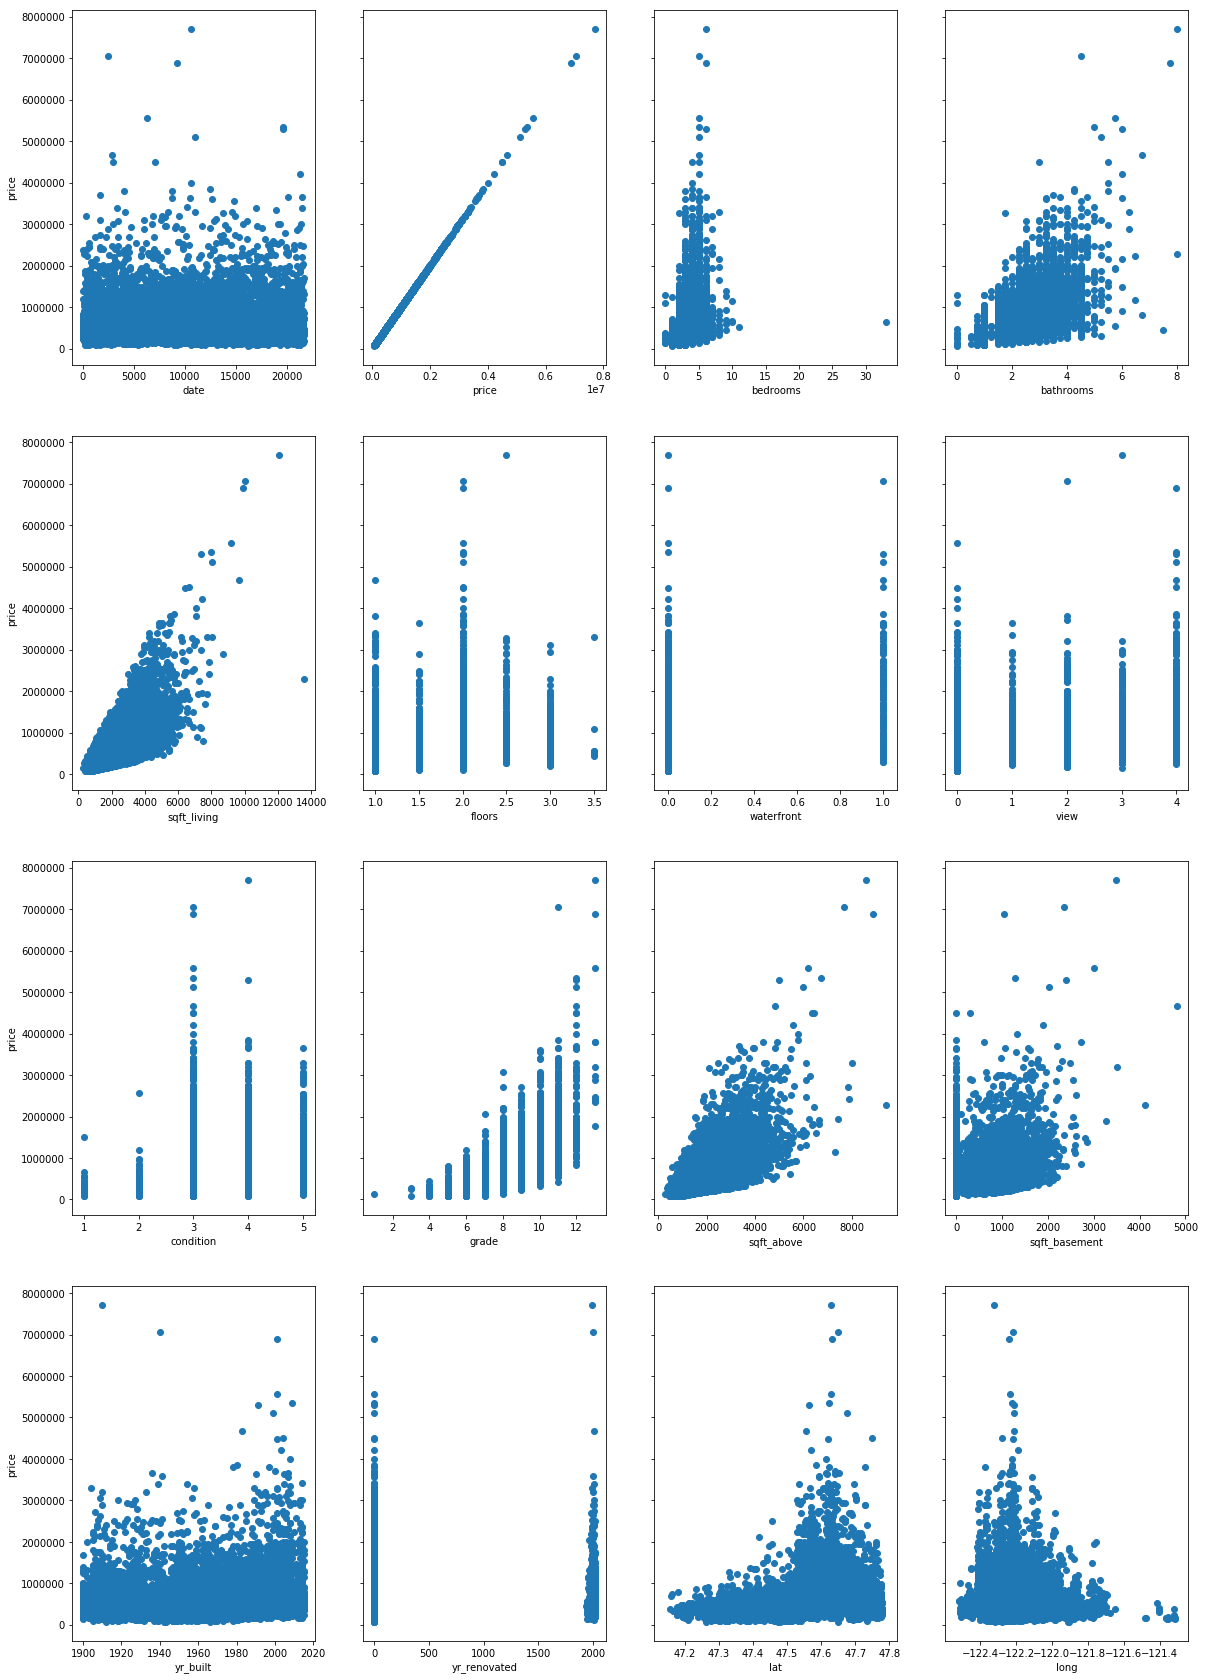

In [24]:
def plot_scatter(num_rows, num_cols, data_x):
    plt.close('all')
    f = plt.figure()    
    f, axes = plt.subplots(nrows = num_rows, ncols = num_cols, sharex=False, sharey = True, figsize=(20,30))
    k = 0 
    j = 0
    
    for i in range(num_rows):
        axes[i][0].set_ylabel('price')
        for j in range(num_cols):
            #if(k == 2):## No graficamos precio,precio
            #    k = 3
            axes[i][j].scatter(data[data_x[k]],data.price)
            axes[i][j].set_xlabel(data_x[k])
            k = k + 1
    plt.show()         
plot_scatter(4, 4, data.columns) 

Obs. En el punto siguiente se realizará el escalado de los datos.

#### 2.c Selección de Atributos _by hand_
> En esta parte comenzaremos entrenando un modelo sin ningún atributo y luego iremos agregando 1 a 1 el atributo que más mejora los resultados de la predicción. En cada paso validaremos qué atributo es el mejor utilizando 5-_fold_ como aprendió en la pregunta anterior. 
Para el modelo sin ningun atributo utilizaremos una predicción constante igual al promedio de los datos de entrenamiento. Luego, en cada iteración, evaluaremos cada uno de los atributos restantes, viendo cual reduce más el error. El error que utilizaremos para esta pregunta sera el MSE o _Mean Square Error_. Luego de elegido un atributo, lo agregamos a la lista de atributos a utilizar y continuamos iterando hasta agotar los atributos restantes. 
Guarde los errores promedio a medida va agregando atributos al modelo y guarde la lista de los atributos que fue agregando, luego grafíque el error promedio en función del número de atributos seleccionado.

>**¿Cuál es el modelo que entrenga un menor error de validación (cual es su lista de atributos)?**

In [25]:
#Copiamos los datos
data_orig = data.copy()
X = data_orig
y = data_orig

In [26]:
#Dejamos solo precio en y y los demás atributos en X

X = data_orig.drop(columns='price')
y = data.price #se pierde el nombre de la columna, con lo que esta comentado más abajo NO

print("X: ", X.shape)
print("y: ", y.shape)


X:  (21613, 16)
y:  (21613,)


Escalar los datos, utilizando la varianza y la media.
Separación de los datos para entrenamiento y evaluación, luego en kfold el conjunto de entrenamiento se divide en conjunto de entrenaminto y test.

In [27]:
#escalado de los datos X
for col in X.columns:
    X[col] = X[col].apply(lambda x: (x - X[col].mean())/X[col].std())

In [28]:
# escalado de los datos Y -- también podría quedar sin escalar
y = y.apply(lambda x: (x - y.mean())/y.std())

In [29]:
data_Xtrain, data_Xval, data_ytrain, data_yval = train_test_split(X, y, test_size=0.25)

In [30]:
print("X_Train: ", data_Xtrain.shape)
print("y_Train: ", data_ytrain.shape)
print("X_Val  : ", data_Xval.shape)
print("y_Val  : ", data_yval.shape)

X_Train:  (16209, 16)
y_Train:  (16209,)
X_Val  :  (5404, 16)
y_Val  :  (5404,)


Rutina para k-folds
- Entrenar
- calcula MSE y almacenar, para luego calcular el promedio de MSE para cada kfold.
- Retorna Promedio MSE y modelo entrenado.

In [31]:
import time
from sklearn.externals import joblib
def perform_kfold(model, X_, Y_, k = 5):
    #seed = 7
    results_errors = []
    results_time  = []
    kfold = KFold(k)
    #kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    for j, (train_idx, test_idx) in enumerate(kfold.split(X_, Y_)):
        ###print('\nFold     :',j)
        ###print("len index: (train: %s , test: %s) " % (len(train_idx), len(test_idx)) )      
        #separa en train y test
        X_train_cv = X_.iloc[train_idx]
        Y_train_cv = Y_.iloc[train_idx]
        X_test_cv  = X_.iloc[test_idx]
        Y_test_cv  = Y_.iloc[test_idx]        
        #entrenamiento
        model.fit(X_train_cv[actuales+[atributo_candidato]], Y_train_cv )
        #print("Score ", model.score(X_train_cv[actuales+[atributo_candidato]], Y_train_cv))
        #Predicción
        y_pred_cv = model.predict(X_test_cv)
        #calculo de MSE
        mse = mean_squared_error(Y_test_cv, y_pred_cv)
        ####print("MSE ", mse)
        results_errors.append(mse)
    prom_mse = np.mean(results_errors) ### OJO con esto
    
    return  prom_mse, model

In [32]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15
0,10544.0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340
1,13682.5,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690
2,16699.0,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720
3,13682.5,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360
4,16276.0,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800


A continuación se va trabajando con cada atributo, eliminando uno por uno, de acuerdo al que tiene menor MSE.

In [33]:
restantes = list(data_Xtrain.columns)
actuales = []
error_actual = ((data_ytrain-data_ytrain.mean())**2).mean()
print("error_actual", error_actual)
errors_mse = []
#errors_mse.append(error_actual)
models = []
models_reg_scaler = []
score = []
mejor_error = error_actual
i = 0
aux = 0
while restantes:
    prom_mse_candidatos = []
    aux = 0
    for atributo_candidato in restantes:
        mejor_candidato = atributo_candidato
        aux_candidatos_mse = []
        # crear nuevo modelo
        #print("**************************************")
        #print("actuales:  ", actuales)
        #print("candidato: ", atributo_candidato )
        reg_scaler = LinearRegression()
        prom_mse,model_reg_scaler = perform_kfold(reg_scaler, data_Xtrain[actuales+[atributo_candidato]], data_ytrain, k = 5)
        if(aux == 0):
            mejor_error = prom_mse
            aux = aux + 1
        #Agrega cada atributo si el promedio de mse de ese modelo es menor al promedio de todo lo que ya llevo
        # evaluar cual se queda y quitarlo de restantes
        #print("prom_mse:  ", prom_mse)
        if(prom_mse <= mejor_error):
            mejor_error     = prom_mse
            mejor_candidato = atributo_candidato
            mejor_modelo    = model_reg_scaler
        
    actuales.append(mejor_candidato)
    restantes.remove(mejor_candidato)
    errors_mse.append(mejor_error)
    models.append(list(actuales))
    models_reg_scaler.append(mejor_modelo)
    score.append(mejor_modelo.score(data_Xtrain[actuales], data_ytrain))
    print("--************")
    print("--Mejor error:     ", mejor_error)
    print("--Score:           ", mejor_modelo.score(data_Xtrain[actuales], data_ytrain))
    print("--Mejor candidato: ", mejor_candidato)
    print("--Actuales:        ",actuales)

error_actual 0.9862837906229844
--************
--Mejor error:      0.5074968907357266
--Score:            0.32692289372631983
--Mejor candidato:  sqft_living15
--Actuales:         ['sqft_living15']
--************
--Mejor error:      0.5005971004067613
--Score:            -0.2502348882755232
--Mejor candidato:  long
--Actuales:         ['sqft_living15', 'long']
--************
--Mejor error:      0.47027548548926684
--Score:            0.1462590748251863
--Mejor candidato:  lat
--Actuales:         ['sqft_living15', 'long', 'lat']
--************
--Mejor error:      0.41010545551212907
--Score:            0.02268430118110165
--Mejor candidato:  yr_renovated
--Actuales:         ['sqft_living15', 'long', 'lat', 'yr_renovated']
--************
--Mejor error:      0.40495207419075374
--Score:            0.04771878131337293
--Mejor candidato:  yr_built
--Actuales:         ['sqft_living15', 'long', 'lat', 'yr_renovated', 'yr_built']
--************
--Mejor error:      0.396150434050544
--Score:   

In [34]:
print("Error MSE", errors_mse)

Error MSE [0.5074968907357266, 0.5005971004067613, 0.47027548548926684, 0.41010545551212907, 0.40495207419075374, 0.396150434050544, 0.395105126405603, 0.35748068765939156, 0.32250249387073887, 0.32008006928511545, 0.31240217334739023, 0.309654389683711, 0.3094382421113725, 0.3094382421113725, 0.3073708237115773, 0.306408594458459]


In [35]:
# Atributos del modelo que tiene menor MSE
print("Models ", models[len(models)-1])

Models  ['sqft_living15', 'long', 'lat', 'yr_renovated', 'yr_built', 'sqft_basement', 'sqft_above', 'grade', 'condition', 'view', 'waterfront', 'floors', 'sqft_living', 'bathrooms', 'bedrooms', 'date']


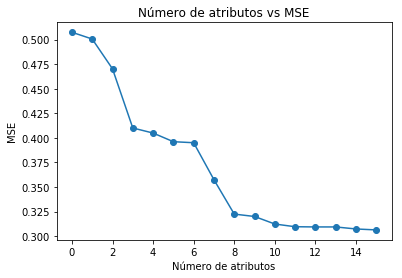

In [36]:
plt.plot(errors_mse,"o-")
#plt.yscale('log')
plt.title('Número de atributos vs MSE')
plt.xlabel('Número de atributos')
plt.ylabel('MSE')
plt.show()

Como se observa en la gráfica a medida que se van aunmentando los atributos, se van disminuyendo notoriamente el error. Desde el atributo 8 es que ya se obtienen los mejores resultados. Consideramos que elegir  desde 12 atributos es suficiente para una correcta predicción.

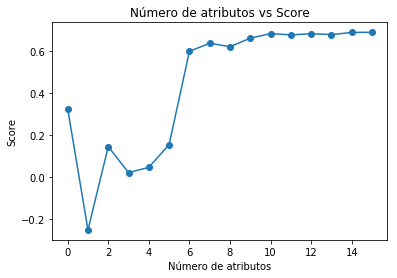

In [37]:
plt.plot(score,"o-")
#plt.yscale('log')
plt.title('Número de atributos vs Score')
plt.xlabel('Número de atributos')
plt.ylabel('Score')
plt.show()

Para verificar los modelos, también se obtienen los valores de score para cada modelo,  observando de igual forma que con MSE que desde el atributo 8 se obtienen buenos resultados.

#### 2.d Validar
> Utilizando la lista de atributos que calculó en la pregunta anterior, realice un gráfico de como varía el error de entrenamiento (error sobre `x_tr`) y de validación (sobre `x_val`) a medida va agregando los atributos. Comente como sus hallazgos se relacionan con lo aprendido teóricamente. 

Comentario: Del punto anterior, tenemos los datos divididos en conjunto de entrenamiento y validación:
- data_Xtrain 
- data_ytrain
- data_yval
- data_Xval

A continuación, se obtiene la predicción par caada dato de validación.

In [38]:
val_mse = []
for i in range(0,16):
    data_ypred = models_reg_scaler[i].predict(data_Xval[models[i]])
    mse = mean_squared_error(data_yval, data_ypred)
    val_mse.append(mse)

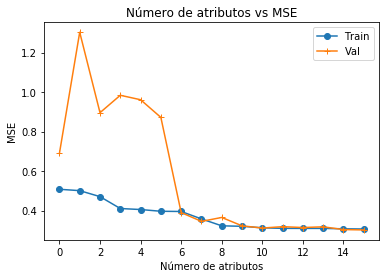

In [39]:
#Graficamos MSE vs atributos para los datos de entrenamiento y validación
plt.plot(errors_mse,"o-", label='Train')
plt.plot(val_mse,"+-", label='Val')
#plt.yscale("log")
plt.legend()
plt.title('Número de atributos vs MSE')
plt.xlabel('Número de atributos')
plt.ylabel('MSE')
plt.show()

De acuerdo a lo anterior, se puede concluir que desde el atributo 8 es que ya se tiene un modelo estable, tanto para el conjunto de entrenamiento como validación.

#### 2.e Mutual information
>Calcule la Información Mutual para nuestros datos. Note que esta función ya esta implementada.
Que información puede obtener de estos resultados? Concuerdan los datos encontrados con lo encontrado en la pregunta anterior? 

In [40]:
#calculamo MI para cada atributo
from sklearn.feature_selection import mutual_info_regression
MI = list(zip(mutual_info_regression(data_Xtrain, data_ytrain),data_Xtrain.columns))
print(MI)

[(0.00833906571462073, 'date'), (0.08624113735726135, 'bedrooms'), (0.18792904776993824, 'bathrooms'), (0.33561497325771406, 'sqft_living'), (0.07759422163442409, 'floors'), (0.013327103013623276, 'waterfront'), (0.06422097326946918, 'view'), (0.009064177515254901, 'condition'), (0.33830967177463345, 'grade'), (0.24139760948436084, 'sqft_above'), (0.07284172208157091, 'sqft_basement'), (0.08106560778246408, 'yr_built'), (0.008493830412650283, 'yr_renovated'), (0.3515976077394498, 'lat'), (0.11792093647201352, 'long'), (0.2703849018598694, 'sqft_living15')]


In [41]:
#ordenamos los resultados para una mejor visualización
sorted(list(zip(mutual_info_regression(data_Xtrain, data_ytrain),data_Xtrain.columns)))

[(0.007294914830322519, 'date'),
 (0.01355321521057462, 'yr_renovated'),
 (0.013766651521152307, 'waterfront'),
 (0.018617634872148514, 'condition'),
 (0.060189686856793045, 'view'),
 (0.06663861560859852, 'sqft_basement'),
 (0.07931429213175356, 'yr_built'),
 (0.07944705897875748, 'floors'),
 (0.08149985786602709, 'bedrooms'),
 (0.11950228724161782, 'long'),
 (0.20304660435140853, 'bathrooms'),
 (0.24068134696147236, 'sqft_above'),
 (0.27039559480972297, 'sqft_living15'),
 (0.3334322483761536, 'sqft_living'),
 (0.34224822828496126, 'grade'),
 (0.35091531388962416, 'lat')]


Considerando que la Información Mutua  mide la información que X e Y comparten, es decir, mide como el conocer una variable reduce la incertidumbre sobre la otra.

Cuando dos variables son independientes, una variable no entregará información sobre la otra, por lo que la información mutua será 0.

Y en caso que X e Y son iguales, entonces toda la información entregada por una variable es compartida con la otra, por lo que la entropía para ambas variables será la misma.

$$I(x_i ;  y_j) = log \frac{P(x_i|y_j)}{P(x_i)}$$

De esta forma, mientrás el valor de MI es más grande, significa que tiene mayor relación con la otra, por lo que las variables que que más destacamos, por estar relacionadas con $i$ son:

'bathrooms', 'sqft_above', 'sqft_living15', 'lat', 'grade', 'sqft_living'.

Finalemnte, al comparar con la lista de los valores que se obtienen del punto anterior, donde la lista de atributos queda de la siguiente forma:

`['sqft_living15', 'long', 'lat', 'yr_renovated', 'yr_built', 'sqft_basement', 'sqft_above', 'grade', 'condition', 'view', 'waterfront', 'floors', 'sqft_living', 'bathrooms', 'bedrooms', 'date']`

Se observa que no existe una relación 100% en el orden obtenido con MI y la lista de tributos, y esto puede ser a raíz de que MI mide sólo la relación entre dos atributos, y no mide la relación lineal, que es lo que se obtuvo con la lista de los atributos. Por lo que MI para este caso, puede que no sea la mejor métrica.

#### 2.f Más variables
>Repita lo realizado en la pregunta 2.c (incluyendo gráficos) pero agregando la variable categorica `zipcode` utilizando nuevamente `pd.get_dummies`. Esta vez puede optar por no realizar _K-fold_ si no entrenar una sola vez cada modelo pues podría resultar demasiado demandante en tiempo utilizar _K-fold_, aunque siempre es valorado. 
Qué modelo se comporta mejor y por qué cree que sucede esto? 

In [42]:
#Copiamos los datos-- partiendo de la data original
data_orig = data_original.copy()
X = data_orig
y = data_orig

In [43]:
data_orig.shape

(21613, 21)

In [44]:
X.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
#Dejamos solo precio en y y los demás atributos en X

X = data_orig.drop(columns='price')
y = data_orig.price #se pierde el nombre de la columna, con lo que esta comentado más abajo NO
print("X: ", X.shape)
print("y: ", y.shape)

X:  (21613, 20)
y:  (21613,)


In [46]:
## Transformación de columna date- según enunciado
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))   
    return res
X['date'] = X.date.apply(to_num).rank()

In [47]:
##eliminando los datos
X = X.drop(columns=['id','sqft_lot','sqft_lot15'])  #ahora queda zipcode incluído

In [48]:
X.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [49]:
#escalado de los datos
for col in X.columns:
    X[col] = X[col].apply(lambda x: (x - X[col].mean())/X[col].std())
    
# escalado de datos y
y = y.apply(lambda x: (x - y.mean())/y.std())    

#separar en conjunto de entrenamiento y validación
data_Xtrain, data_Xval, data_ytrain, data_yval = train_test_split(X, y, test_size=0.25)

In [50]:
data_Xtrain_new = pd.get_dummies(data_Xtrain.zipcode)
col = list(data_Xtrain.columns)
#vinculación de las nuevas columnas con la estructura original.
col.remove('zipcode')
data_Xtrain_new[col] = data_Xtrain[col]
#data_Xtrain_new=data_Xtrain_new.astype(np.float64)

In [51]:
print("X_Train: ", data_Xtrain_new.shape)

X_Train:  (16209, 86)


In [52]:
data_Xval_new = pd.get_dummies(data_Xval.zipcode)
col = list(data_Xval.columns)
#vinculación de las nuevas columnas con la estructura original.
col.remove('zipcode')
data_Xval_new[col] = data_Xval[col]
#data_Xtrain_new=data_Xtrain_new.astype(np.float64)
print("X_val: ",data_Xval_new.shape)

X_val:  (5404, 86)


In [53]:
data_Xtrain_new.head()

,-1.4379920939932533,-1.4193022610944173,-1.4006124281955814,-1.3819225952967455,-1.3632327623979097,-1.3445429294990736,-1.3258530966002378,-1.307163263701402,-1.26978359790373,-1.251093765004894,...,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15
5068,0,0,0,0,0,0,0,0,0,0,...,-0.305752,-0.629172,0.291909,-0.481095,0.742227,1.463734,-0.210124,-0.054506,1.533047,-0.432676
16740,0,0,0,0,0,0,0,0,0,0,...,-0.305752,-0.629172,-0.558823,-0.746767,0.471086,0.033870,-0.210124,1.190409,0.098676,-0.709890
10768,0,0,0,0,0,0,0,0,0,0,...,-0.305752,-0.629172,0.291909,1.064629,-0.658666,0.953068,-0.210124,0.335928,1.405231,1.216017
10274,0,0,0,0,0,0,0,0,0,0,...,-0.305752,0.907533,-0.558823,-1.072818,1.329698,0.170047,-0.210124,-0.741554,0.396912,-0.636939
9526,0,0,0,0,0,0,0,0,0,0,...,-0.305752,0.907533,-1.409554,-1.157350,-0.658666,-0.578930,-0.210124,1.346294,-0.852837,-0.943333


Con el objetivo de poder mantener un punto de comparación con los realizado en 2c, es que se opta por utilizar kfold, pero ahora con zipcode con `pd.get_dummies`.

In [54]:
restantes = list(data_Xtrain_new.columns)
actuales = []
error_actual = ((data_ytrain-data_ytrain.mean())**2).mean()
print("error_actual", error_actual)
errors_mse_new = []
#errors_mse.append(error_actual)
models_new = []
models_reg_scaler = []
score = []
mejor_error = error_actual
i = 0
aux = 0
while restantes:
    prom_mse_candidatos = []
    aux = 0
    for atributo_candidato in restantes:
        mejor_candidato = atributo_candidato
        aux_candidatos_mse = []
        # crear nuevo modelo
        #print("**************************************")
        #print("actuales:  ", actuales)
        #print("candidato: ", atributo_candidato )
        reg_scaler = LinearRegression()
        prom_mse,model_reg_scaler = perform_kfold(reg_scaler, data_Xtrain_new[actuales+[atributo_candidato]], data_ytrain, k = 5)
        if(aux == 0):
            mejor_error = prom_mse
            aux = aux + 1
        #Agrega cada atributo si el promedio de mse de ese modelo es menor al promedio de todo lo que ya llevo
        # evaluar cual se queda y quitarlo de restantes
        #print("prom_mse:  ", prom_mse)
        if(prom_mse <= mejor_error):
            mejor_error     = prom_mse
            mejor_candidato = atributo_candidato
            mejor_modelo    = model_reg_scaler
        
    actuales.append(mejor_candidato)
    restantes.remove(mejor_candidato)
    errors_mse_new.append(mejor_error)
    models_new.append(list(actuales))
    models_reg_scaler.append(mejor_modelo)
    score.append(mejor_modelo.score(data_Xtrain_new[actuales], data_ytrain))
    #print("--************")
    print("--Mejor error:     ", mejor_error)
    print("--Score:           ", mejor_modelo.score(data_Xtrain_new[actuales], data_ytrain))
    print("--Mejor candidato: ", mejor_candidato)
    #print("--Actuales:        ",actuales)

error_actual 0.9909798706006433
--Mejor error:      0.5017772560929467
--Score:            0.3213087463876829
--Mejor candidato:  sqft_living15
--Mejor error:      0.4972415819863961
--Score:            -0.3008397148423747
--Mejor candidato:  long
--Mejor error:      0.46575629552885767
--Score:            0.10230704830149318
--Mejor candidato:  lat
--Mejor error:      0.4067565932628073
--Score:            -0.007991150864415264
--Mejor candidato:  yr_renovated
--Mejor error:      0.40065408547884696
--Score:            0.01713558239160362
--Mejor candidato:  yr_built
--Mejor error:      0.3915357129883411
--Score:            0.11943336566897578
--Mejor candidato:  sqft_basement
--Mejor error:      0.3895193896277725
--Score:            0.5034899789651435
--Mejor candidato:  sqft_above
--Mejor error:      0.35261737839518953
--Score:            0.6475628816478602
--Mejor candidato:  grade
--Mejor error:      0.3270724589943731
--Score:            -1.0437404652649098
--Mejor candidato: 

In [55]:
print("Error MSE (zipcode):", min(errors_mse_new))
print("Error MSE          :", min(errors_mse))

Error MSE (zipcode): 0.19890251822724217
Error MSE          : 0.306408594458459


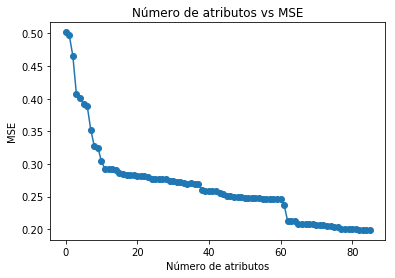

In [56]:
plt.plot(errors_mse_new,"o-")
#plt.yscale('log')
plt.title('Número de atributos vs MSE')
plt.xlabel('Número de atributos')
plt.ylabel('MSE')
plt.show()

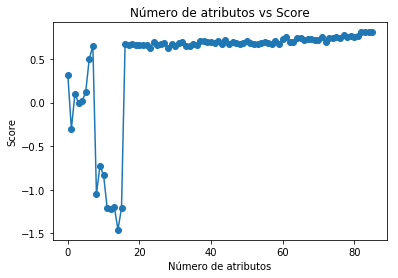

In [57]:
plt.plot(score,"o-")
#plt.yscale('log')
plt.title('Número de atributos vs Score')
plt.xlabel('Número de atributos')
plt.ylabel('Score')
plt.show()

In [58]:
print("Max score (zipcode): ", max(score))

Max score (zipcode):  0.805921410572265


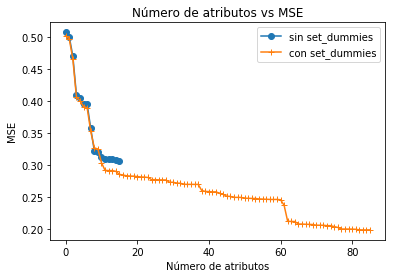

In [59]:
plt.plot(errors_mse,"o-", label='sin set_dummies')
plt.plot(errors_mse_new,"+-", label = 'con set_dummies')
#plt.yscale('log')
plt.legend()
plt.title('Número de atributos vs MSE')
plt.xlabel('Número de atributos')
plt.ylabel('MSE')
plt.show()

Como se se observa en las tres últimas gráficas, todos los atributos aportan información, y con más atributos se logra un MSE menor (se compara con valor de MSE pregunta 2c, en el último gráfico).  Por lo que se puede concluír que a medida que se tiene mayor cantidad de atributos, se pueden mejorar los resultados, sin embargo existe un costo computacional asociado. Por lo que es importante poder determinar el tradeoff entre tiempo de computo vs resultados esperados.

También se compara el valor de Score, y se observa que a medida de aumentan los atributos, también se obieneten mejores resultados.

Ahora se comparan los resultados del conjunto de entrenamiento y el conjunto de validación.

In [60]:
val_mse_new = []
for i in range(0,len(models_reg_scaler)):
    data_ypred = models_reg_scaler[i].predict(data_Xval_new[models_new[i]])
    mse = mean_squared_error(data_yval, data_ypred)
    val_mse_new.append(mse)

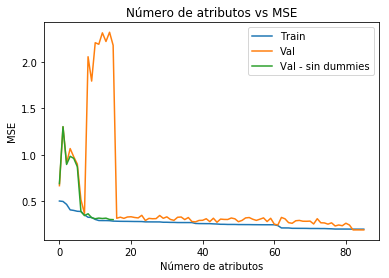

In [61]:
#Graficamos MSE vs atributos para los datos de entrenamiento y validación
plt.plot(errors_mse_new, label='Train')
plt.plot(val_mse_new, label='Val')
plt.plot(val_mse, label='Val - sin dummies')
#plt.yscale("log")
plt.legend()
plt.title('Número de atributos vs MSE')
plt.xlabel('Número de atributos')
plt.ylabel('MSE')
plt.show()

Como se observa, con el conjunto de validación se obtienen resultados menos estables y peores con respecto al set de entrenamiento, por lo que se puede entender que los modelos nos están generalizando. Sin embargo llega un punto en que los modelos se comportan de forma muy similar, por lo que es posible que este con efecto de overfitting o que ya no tenga sentido agregar más atributos (por ejemplo mayor a 40).